<a href="https://colab.research.google.com/github/ZhenJie-Zhang/sneakers_recommend_system/blob/master/%E2%80%9CYOLOv3_shoes_done_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls

sample_data


Cloning into 'darknet'...
remote: Enumerating objects: 10881, done.
remote: Total 10881 (delta 0), reused 0 (delta 0), pack-reused 10881
Receiving objects: 100% (10881/10881), 10.35 MiB | 10.66 MiB/s, done.
Resolving deltas: 100% (7373/7373), done.
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [31.7 kB]
Ign:10 https://developer.d

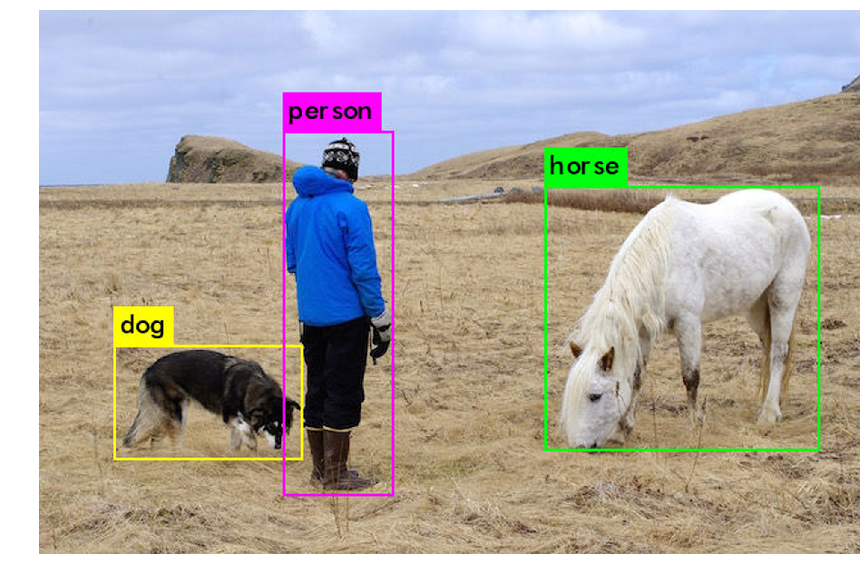

In [0]:
!git clone https://github.com/AlexeyAB/darknet
  
!apt-get update
!apt-get upgrade


!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

!apt-get install libavcodec-dev libavformat-dev libswscale-d

!apt-get install libopencv-dev

  
%cd darknet

!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile


!ls
%cd ../
!ls


!apt install g++-5
!apt install gcc-5

!apt update
!apt upgrade

import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

%cd darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!make

!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)
  
  

imShow('predictions.jpg')

In [0]:
!ls data

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


In [18]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

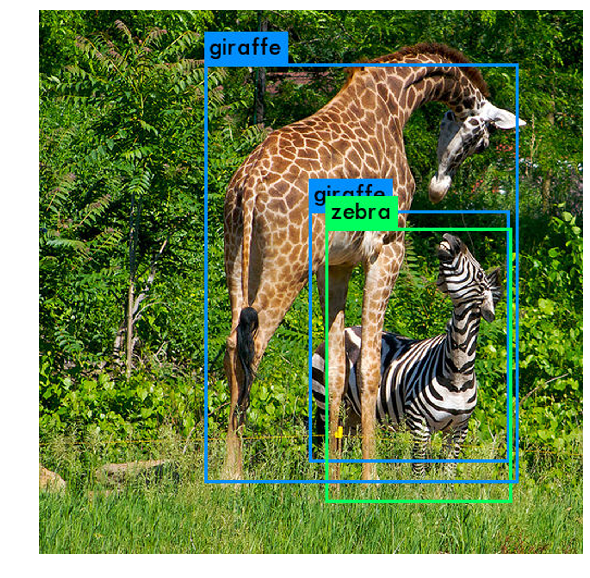

In [19]:
imShow('predictions.jpg')

In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights

In [0]:
!./darknet detector demo cfg/coco.data cfg/yolo.cfg yolov3.weights data/giraffe.jpg

In [0]:
!ls

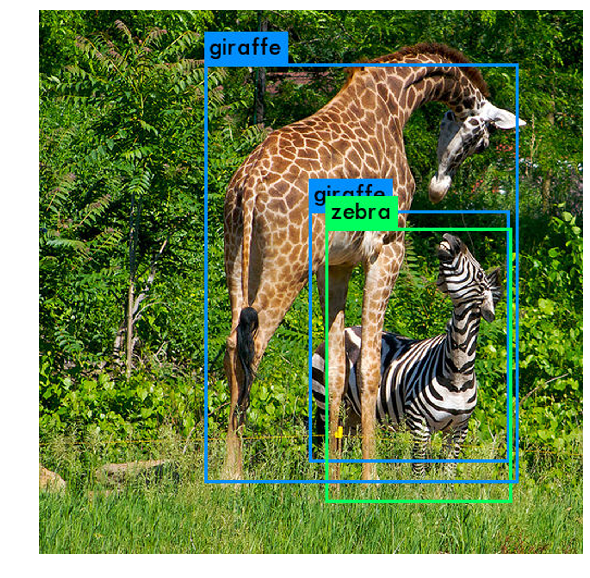

In [23]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd 
%cd darknet
!ls
%cd data
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

/root
[Errno 2] No such file or directory: 'darknet'
/root
[Errno 2] No such file or directory: 'data'
/root


Saving gettyimages-683695082-640_adpp.mp4 to gettyimages-683695082-640_adpp.mp4
saved file gettyimages-683695082-640_adpp.mp4


In [0]:
# And finally run it! Please check if you have given the right video file name
%cd 
!ls
%cd /content/darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/gettyimages-683695082-640_adpp.mp4 -i 0 -out_filename res.avi

/root
gettyimages-683695082-640_adpp.mp4
/content/darknet
Demo
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF


In [0]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')

total 498464
drwxr-xr-x 15 root root      4096 Sep 21 07:14 .
drwxr-xr-x  1 root root      4096 Sep 21 06:02 ..
drwxr-xr-x  4 root root      4096 Sep 21 06:02 3rdparty
-rw-r--r--  1 root root      5851 Sep 21 06:02 appveyor.yml
drwxr-xr-x  2 root root      4096 Sep 21 06:10 backup
drwxr-xr-x  3 root root      4096 Sep 21 06:02 build
-rwxr-xr-x  1 root root      8265 Sep 21 06:02 build.ps1
-rwxr-xr-x  1 root root      2044 Sep 21 06:02 build.sh
drwxr-xr-x  3 root root      4096 Sep 21 06:02 cfg
drwxr-xr-x  2 root root      4096 Sep 21 06:02 .circleci
drwxr-xr-x  3 root root      4096 Sep 21 06:02 cmake
-rw-r--r--  1 root root     20019 Sep 21 06:02 CMakeLists.txt
-rwxr-xr-x  1 root root   3665144 Sep 21 07:01 darknet
-rw-r--r--  1 root root      1363 Sep 21 06:02 DarknetConfig.cmake.in
-rw-r--r--  1 root root     16517 Sep 21 06:02 darknet.py
-rw-r--r--  1 root root      4010 Sep 21 06:02 darknet_video.py
drwxr-xr-x  3 root root      4096 Sep 21 07:08 data
drwxr-xr-x  8 root root      4

In [0]:
!mkdir shoes
%cd shoes
!mkdir images
!mkdir labels
!mkdir Yolos
!mkdir cfg
%cd cfg
!mkdir weights

/content/darknet/shoes
/content/darknet/shoes/cfg


In [6]:
%cd ../..
!ls

/content/darknet
3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     shoes
build	      darknet.py	      Makefile		     src
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_v2.sh
build.sh      data		      obj		     video_yolov3.sh
cfg	      image_yolov2.sh	      predictions.jpg	     yolov3.weights
cmake	      image_yolov3.sh	      README.md


In [7]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-09-22 05:31:06--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.7MB/s    in 8.5s    

2019-09-22 05:31:15 (18.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [34]:
!./darknet detector train shoes/cfg/obj.data shoes/cfg/yolov3.cfg darknet53.conv.74 -dont_show

yolov3
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   

KeyboardInterrupt: ignored

In [0]:
!ls -l

In [37]:
!./darknet detector test shoes/cfg/obj.data shoes/cfg/yolov3.cfg shoes/cfg/weights/yolov3_1000.weights data/134210-0-2.jpg

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [25]:
!cp shoes/cfg/weights/yolo_2000.weights /cfg/yolo_shoes_2000.weights

cp: cannot stat 'shoes/cfg/weights/yolo_2000.weights': No such file or directory


In [39]:
!./darknet detect shoes/cfg/yolov3.cfg shoes/cfg/weights/yolov3_2000.weights shoes/Yolos/shoes/Yolos/xshoes_100.JPEG

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

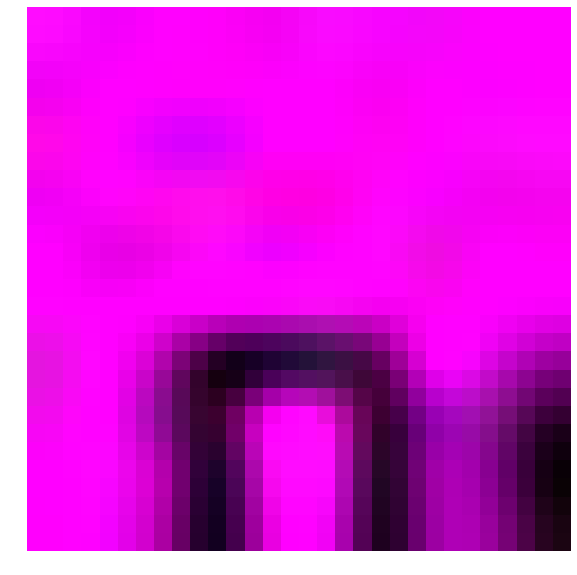

In [40]:
imShow('predictions.jpg')